# Amazon Sales Data

Import Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

1. Get & Merge Data from All Categories

In [2]:
# Get data file names
path = r'/Users/nikhilsharma/Desktop/Data/Datasets/Old/Amazon Sales Data'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
amazon_sales = pd.concat(dfs, ignore_index=True)

2. Check Data Shape

In [3]:
print(amazon_sales.shape)

(1103170, 10)


3. Check Data Columns

In [4]:
print(amazon_sales.columns)

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'Unnamed: 0'],
      dtype='object')


4. Remove Columns Not Needed

In [5]:
#print(amazon_sales.info())

amazon_sales.drop(columns=['Unnamed: 0', 'image', 'link'], inplace=True)

5. Check Data Without the Columns

In [6]:
print(amazon_sales.shape)

(1103170, 7)


6. Check Data Type

In [7]:
print(amazon_sales.info()) 
print(amazon_sales.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   name            1103170 non-null  object
 1   main_category   1103170 non-null  object
 2   sub_category    1103170 non-null  object
 3   ratings         751582 non-null   object
 4   no_of_ratings   751582 non-null   object
 5   discount_price  980844 non-null   object
 6   actual_price    1067544 non-null  object
dtypes: object(7)
memory usage: 58.9+ MB
None
name              object
main_category     object
sub_category      object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object


7. Convert Data Types Appropriately

In [8]:
amazon_sales['ratings'] = pd.to_numeric(amazon_sales['ratings'], errors='coerce')
amazon_sales['no_of_ratings'] = pd.to_numeric(amazon_sales['no_of_ratings'], errors='coerce')


amazon_sales['discount_price'] = amazon_sales['discount_price'].str.replace(',', '')
amazon_sales['discount_price'] = amazon_sales['discount_price'].str.replace('₹', '')
amazon_sales['discount_price'] = pd.to_numeric(amazon_sales['discount_price'], errors='coerce')


amazon_sales['actual_price'] = amazon_sales['actual_price'].str.replace(',', '')
amazon_sales['actual_price'] = amazon_sales['actual_price'].str.replace('₹', '')
amazon_sales['actual_price'] = pd.to_numeric(amazon_sales['actual_price'], errors='coerce')

print(amazon_sales.dtypes)

name               object
main_category      object
sub_category       object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
dtype: object


8. Check for Percentage of Null Values in Each Column

Ratings

In [9]:
rn = amazon_sales['ratings'].isna().sum()
r = len(amazon_sales['ratings'])

prn = rn/r * 100

print(rn)
print(r) 
print(prn)

364054
1103170
33.00071611809604


No_of_ratings

In [10]:
rn = amazon_sales['no_of_ratings'].isna().sum()
r = len(amazon_sales['no_of_ratings'])

prn = rn/r * 100

print(rn)
print(r) 
print(prn)

425112
1103170
38.53549316968373


Discount_price

In [11]:
rn = amazon_sales['discount_price'].isna().sum()
r = len(amazon_sales['discount_price'])

prn = rn/r * 100

print(rn)
print(r) 
print(prn)

122326
1103170
11.088590153829418


Actual_price

In [12]:
rn = amazon_sales['actual_price'].isna().sum()
r = len(amazon_sales['actual_price'])

prn = rn/r * 100

print(rn)
print(r) 
print(prn)

35626
1103170
3.229420669525096


9. Since actual & discount price have missing values, let's check for no. of rows that have null in both columns

In [13]:
rin = amazon_sales['actual_price'].isna().sum() & amazon_sales['discount_price'].isna().sum()
r = len(amazon_sales['actual_price'])

prn = rin/r * 100

print(rin)
print(r)
print(prn)

35074
1103170
3.1793830506630893


10. Drop rows with Null values in both Actual & Discounted Price

In [14]:
amazon_sales = amazon_sales.dropna(subset=['actual_price','discount_price'], how='all')
print(len(amazon_sales))

1067544


In [15]:
amazon_sales.columns

Index(['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings',
       'discount_price', 'actual_price'],
      dtype='object')

11. Number of Main Categories

In [16]:
print(amazon_sales['main_category'].value_counts())

accessories                222342
women's clothing           151624
men's clothing             147556
tv, audio & cameras        132714
men's shoes                109726
stores                      64670
appliances                  62652
home & kitchen              28946
kids' fashion               26412
sports & fitness            24506
bags & luggage              19964
beauty & health             19816
car & motorbike             13974
toys & baby products        12196
women's shoes               10514
industrial supplies          8020
grocery & gourmet foods      6564
pet supplies                 3238
music                        2076
home, kitchen, pets            34
Name: main_category, dtype: int64


12. Number of Sub Categories

In [17]:
print(amazon_sales.value_counts('sub_category'))

sub_category
Men's Fashion              38088
Clothing                   38066
Western Wear               38030
Bags & Luggage             38000
Lingerie & Nightwear       37990
                           ...  
STEM Toys Store               92
Fashion Sales & Deals         88
Toys Gifting Store            48
International Toy Store       46
Refurbished & Open Box        34
Length: 112, dtype: int64


13. Min & Max of Actual & Discount Price by Main Category

In [18]:
round(amazon_sales.groupby('main_category')[['actual_price','discount_price']].agg(['min','max']),2)

actual_price               discount_price           
                                 min           max            min        max
main_category                                                               
accessories                      4.0  1.200000e+06          10.00   499999.0
appliances                      59.0  6.000000e+05          20.00   230000.0
bags & luggage                  80.0  1.944990e+05          10.00   140000.0
beauty & health                 10.0  1.200000e+05           9.00    95000.0
car & motorbike                 33.0  1.899900e+05          29.00   119900.0
grocery & gourmet foods         10.0  3.800000e+04           8.00    13899.0
home & kitchen                  25.0  9.900000e+09          20.00    60500.0
home, kitchen, pets           1499.0  9.290000e+03        1199.00     8541.0
industrial supplies             54.0  1.609520e+05          35.94   144856.0
kids' fashion                   94.0  1.200000e+06          48.00   406009.0
men's clothing                  30.0  4.049595e+04          75.00    25830.0
men's shoes                     39.0  6.677900e+04          25.00    66649.0
music                           60.0  1.224400e+05          50.00    76900.0
pet supplies                    40.0  2.707278e+04          37.00    14890.0
sports & fitness                50.0  6.108299e+07          51.92   225250.0
stores                           0.0  1.200000e+06          26.15   406009.0
toys & baby products            15.0  5.729700e+04           9.72    30233.0
tv, audio & cameras              0.0  1.594900e+06          10.00  1249990.0
women's clothing                59.0  4.999900e+04          29.00    22999.0
women's shoes                  159.0  8.751800e+04          80.00    43759.0

14. Min & Max of Actual & Discount Price by Sub Category

In [19]:
round(amazon_sales.groupby('sub_category')[['actual_price','discount_price']].agg(['min','max']),2)

actual_price           discount_price          
                                      min       max            min       max
sub_category                                                                
Air Conditioners                    499.0  149000.0         199.00  128800.0
All Appliances                       59.0  158490.0          20.00   83990.0
All Car & Motorbike Products         33.0   43399.0          53.00   27007.0
All Electronics                      20.0  161999.0          10.00  134999.0
All Exercise & Fitness               59.0   62480.0          51.92   29990.0
...                                   ...       ...            ...       ...
Washing Machines                    180.0  600000.0          99.00  230000.0
Watches                             139.0  113750.0          99.00   83650.0
Western Wear                         90.0   49999.0          99.00   14098.0
Women's Fashion                      99.0   70522.1          27.00   64111.0
Yoga                                169.0   43400.0         115.52   16614.0

[112 rows x 4 columns]

15. Impute Missing Values in Ratings & No. of Ratings by Sub & Main Categories Median

In [20]:
azs = amazon_sales

azs['ratings'] = azs.groupby(['sub_category', 'main_category'])['ratings']\
    .transform(lambda x: x.fillna(x.mean()))

azs['no_of_ratings'] = azs.groupby(['sub_category', 'main_category'])['no_of_ratings']\
    .transform(lambda x: x.fillna(x.mean()))

print(azs.isna().sum())

name                  0
main_category         0
sub_category          0
ratings               0
no_of_ratings         0
discount_price    86700
actual_price          0
dtype: int64


16. Mean Ratings by Main Category Sorted Descending

In [21]:
azs1 = azs.groupby(['main_category'])['ratings'].mean().sort_values(ascending=False)

print(azs1)

main_category
grocery & gourmet foods    4.069293
toys & baby products       4.032371
pet supplies               4.030822
home & kitchen             3.975901
bags & luggage             3.963817
music                      3.960684
beauty & health            3.950166
stores                     3.938799
accessories                3.897709
appliances                 3.843492
industrial supplies        3.832971
kids' fashion              3.814707
sports & fitness           3.783251
tv, audio & cameras        3.770600
women's clothing           3.764415
men's clothing             3.738484
car & motorbike            3.723844
women's shoes              3.649100
men's shoes                3.623976
home, kitchen, pets        3.223077
Name: ratings, dtype: float64


17. Mean Ratings by Sub Category Sorted Descending

In [22]:
azs1 = azs.groupby(['sub_category'])['ratings'].mean().sort_values(ascending=False)

print(azs1)

sub_category
International Toy Store        4.572222
Value Bazaar                   4.304545
All Grocery & Gourmet Foods    4.176383
Health & Personal Care         4.173901
Strollers & Prams              4.126721
                                 ...   
Car Electronics                3.507153
Headphones                     3.498524
Personal Care Appliances       3.444898
Security Cameras               3.322563
Refurbished & Open Box         3.223077
Name: ratings, Length: 112, dtype: float64


18. Sum of Ratings by Main Category Sorted Descending

In [23]:
azs1 = azs.groupby(['main_category'])['ratings'].sum().sort_values(ascending=False)

print(azs1)

main_category
accessories                866624.338563
women's clothing           570775.705769
men's clothing             551635.704331
tv, audio & cameras        500411.425775
men's shoes                397644.401791
stores                     254722.135784
appliances                 240802.481925
home & kitchen             115086.420322
kids' fashion              100754.043089
sports & fitness            92712.359903
bags & luggage              79133.636589
beauty & health             78276.498886
car & motorbike             52036.994494
toys & baby products        49178.794715
women's shoes               38366.641875
industrial supplies         30740.428827
grocery & gourmet foods     26710.840345
pet supplies                13051.800121
music                        8222.379487
home, kitchen, pets           109.584615
Name: ratings, dtype: float64


19. Sum of Ratings by Sub Category Sorted Descending

In [24]:
azs1 = azs.groupby(['sub_category'])['ratings'].sum().sort_values(ascending=False)
print(azs1)

sub_category
Bags & Luggage                152079.510371
Men's Fashion                 147956.426290
Fashion & Silver Jewellery    147215.206195
Handbags & Clutches           146802.244244
Clothing                      144477.517380
                                  ...      
STEM Toys Store                  379.400000
Fashion Sales & Deals            334.195349
International Toy Store          210.322222
Toys Gifting Store               196.600000
Refurbished & Open Box           109.584615
Name: ratings, Length: 112, dtype: float64


20. Mean No. of Ratings by Main Category Sorted Descending

In [25]:
azs2 = azs.groupby(['main_category'])['no_of_ratings'].mean().sort_values(ascending=False)


print(azs2)

main_category
grocery & gourmet foods    153.152713
home & kitchen             142.842327
stores                     140.809787
beauty & health            139.937487
toys & baby products       136.939488
appliances                 125.712815
tv, audio & cameras        123.492389
pet supplies                99.666439
women's clothing            90.741081
sports & fitness            78.795996
car & motorbike             74.263196
music                       74.243742
bags & luggage              70.217771
kids' fashion               68.627186
industrial supplies         65.723118
men's shoes                 58.089765
accessories                 55.669481
women's shoes               49.207836
men's clothing              38.128298
home, kitchen, pets          3.692308
Name: no_of_ratings, dtype: float64


21. Mean No. of Ratings by Sub Category Sorted Descending

In [26]:
azs2 = azs.groupby(['sub_category'])['no_of_ratings'].mean().sort_values(ascending=False)

print(azs2)

sub_category
Value Bazaar                571.666667
Health & Personal Care      352.572632
International Toy Store     344.923077
Toys Gifting Store          315.000000
All Electronics             306.805506
                               ...    
Jeans                        29.750443
Kids' Watches                29.711712
Jewellery                    27.603572
Gold & Diamond Jewellery     22.391223
Refurbished & Open Box        3.692308
Name: no_of_ratings, Length: 112, dtype: float64


22. Sum of No. of Ratings by Main Category Sorted Descending

In [27]:
azs1 = azs.groupby(['main_category'])['no_of_ratings'].sum().sort_values(ascending=False)
print(azs1)

main_category
tv, audio & cameras        1.638917e+07
women's clothing           1.375853e+07
accessories                1.237766e+07
stores                     9.106169e+06
appliances                 7.876159e+06
men's shoes                6.373958e+06
men's clothing             5.626059e+06
home & kitchen             4.134714e+06
beauty & health            2.773001e+06
sports & fitness           1.930975e+06
kids' fashion              1.812581e+06
toys & baby products       1.670114e+06
bags & luggage             1.401828e+06
car & motorbike            1.037754e+06
grocery & gourmet foods    1.005294e+06
industrial supplies        5.270994e+05
women's shoes              5.173712e+05
pet supplies               3.227199e+05
music                      1.541300e+05
home, kitchen, pets        1.255385e+02
Name: no_of_ratings, dtype: float64


23. Sum of No. of Ratings by Sub Category Sorted Descending

In [28]:
azs1 = azs.groupby(['sub_category'])['no_of_ratings'].sum().sort_values(ascending=False)
print(azs1)

sub_category
All Electronics            5.847713e+06
Men's Fashion              5.523138e+06
Clothing                   5.053492e+06
Bags & Luggage             4.038489e+06
All Appliances             3.247580e+06
                               ...     
STEM Toys Store            1.768523e+04
International Toy Store    1.586646e+04
Toys Gifting Store         1.512000e+04
Fashion Sales & Deals      4.864558e+03
Refurbished & Open Box     1.255385e+02
Name: no_of_ratings, Length: 112, dtype: float64


24. Average Ratings by Main Category

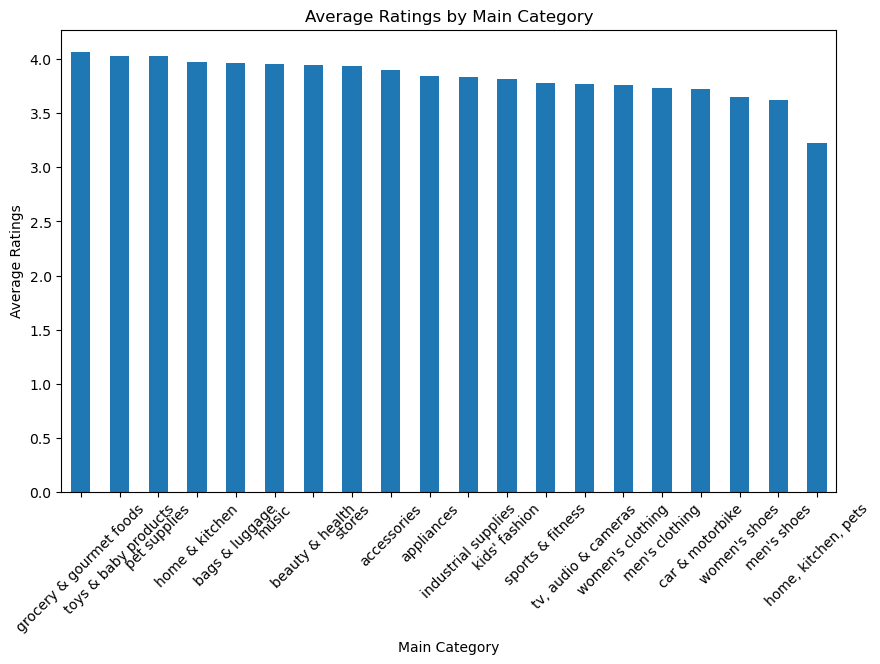

In [29]:
azs1 = azs.groupby('main_category')['ratings'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
azs1.plot(kind='bar')
plt.title('Average Ratings by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.show()

25. Average Ratings by Sub Category (Top 10)

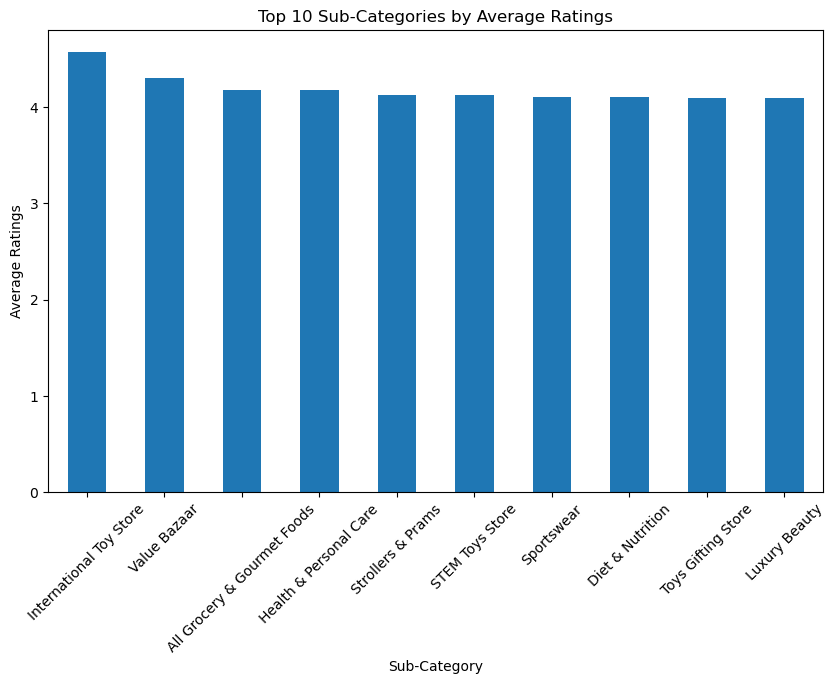

In [30]:
azs1 = azs.groupby('sub_category')['ratings'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
azs1.plot(kind='bar')
plt.title('Top 10 Sub-Categories by Average Ratings')
plt.xlabel('Sub-Category')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.show()

26. Ratings by Main Category

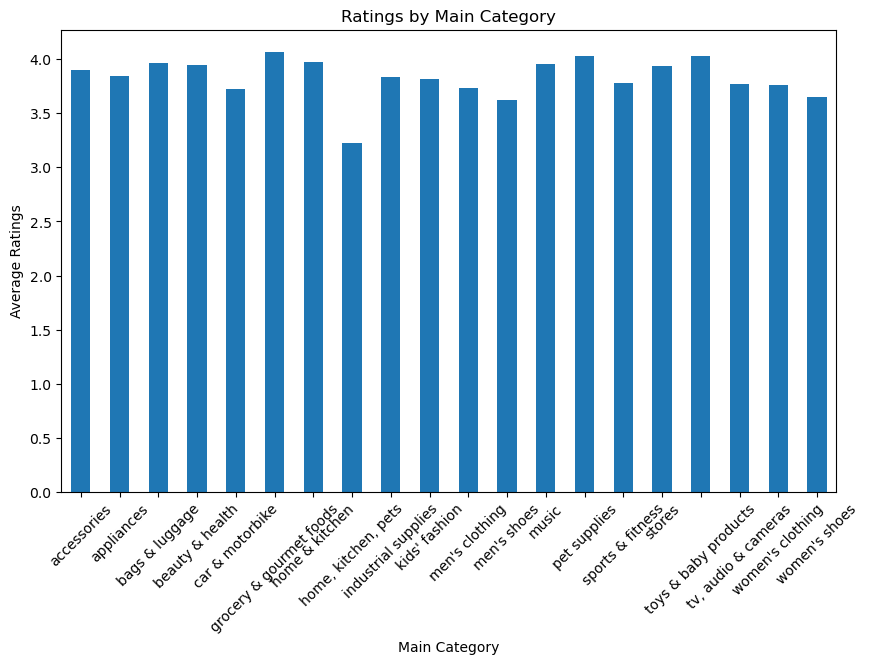

In [31]:
plt.figure(figsize=(10, 6))
azs.groupby('main_category')['ratings'].mean().plot(kind='bar')
plt.title('Ratings by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.show()

27. Top 10 Sub-Categories by Average Ratings

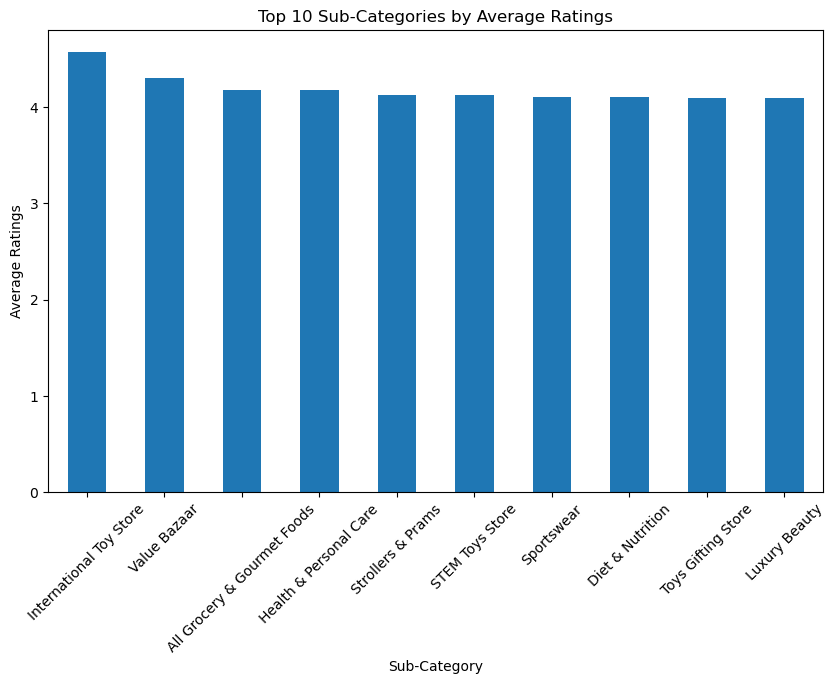

In [32]:
plt.figure(figsize=(10, 6))
azs.groupby('sub_category')['ratings'].mean().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sub-Categories by Average Ratings')
plt.xlabel('Sub-Category')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.show()

28. Ratings v No. of Ratings - Scatter Plot

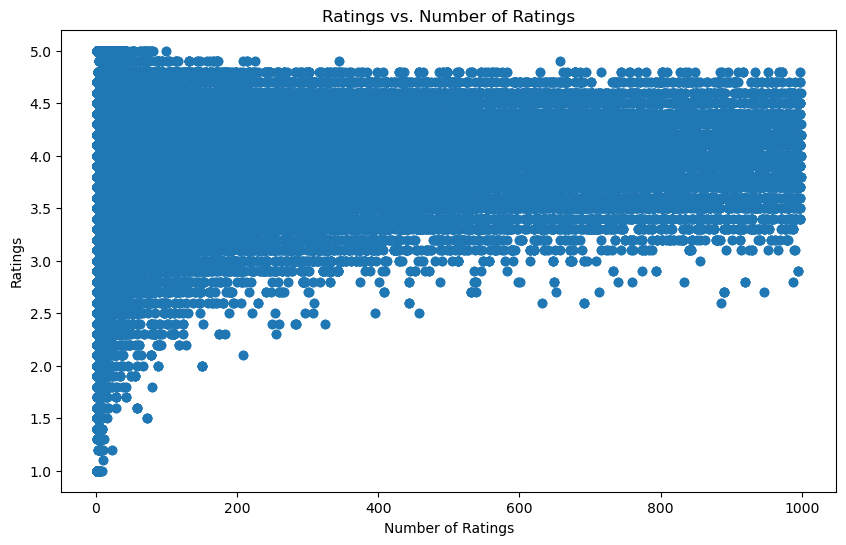

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(azs['no_of_ratings'], azs['ratings'])
plt.title('Ratings vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Ratings')
plt.show()

29. Distribution of Ratings

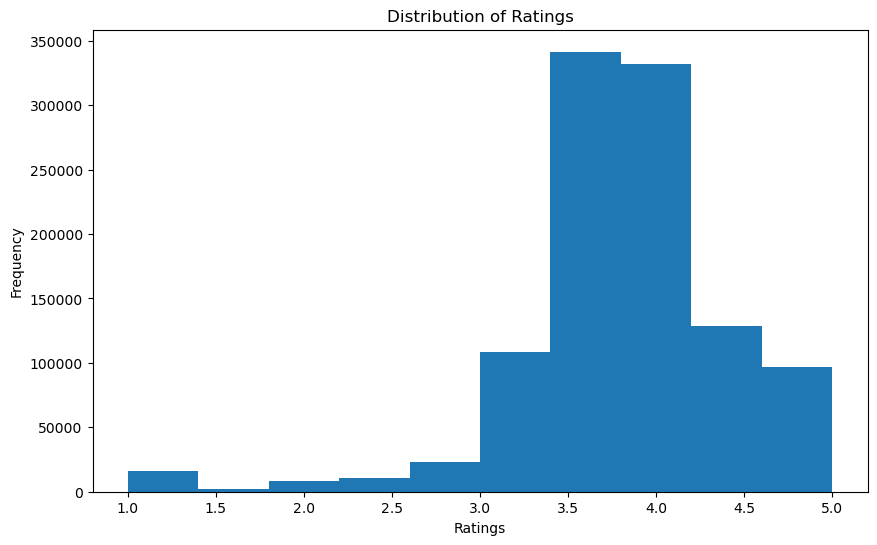

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(azs['ratings'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

30. BoxPlot Grouped & Ratings by Main Category

<Figure size 1000x600 with 0 Axes>

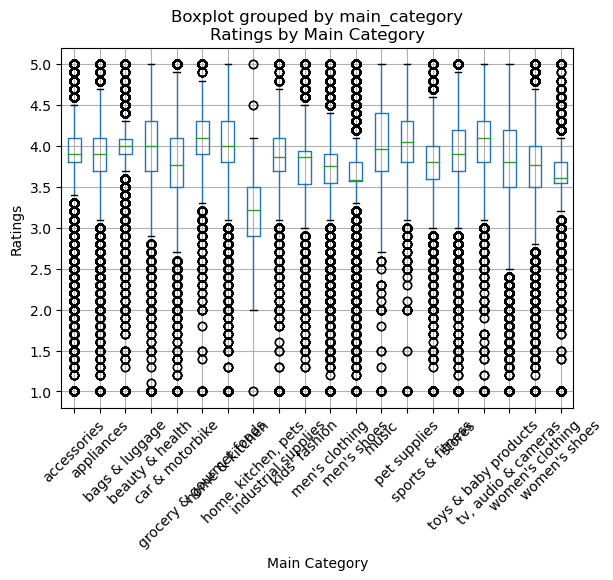

In [35]:
plt.figure(figsize=(10, 6))
azs.boxplot(column='ratings', by='main_category')
plt.title('Ratings by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

31. BoxPlot Grouped & Ratings by Sub-Category

<Figure size 1000x600 with 0 Axes>

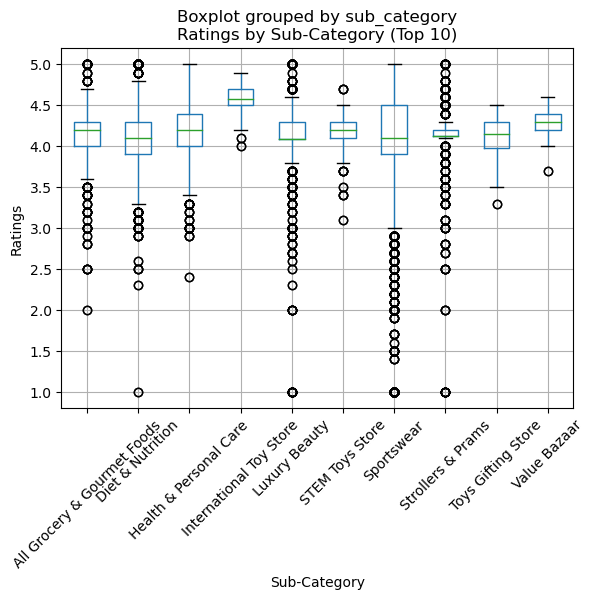

In [36]:
# Calculate the average ratings for each sub-category
sub_category_ratings = azs.groupby('sub_category')['ratings'].mean()

# Get the top 10 sub-categories by ratings
top_sub_categories = sub_category_ratings.nlargest(10).index

# Filter the DataFrame to include only the top 10 sub-categories
azs_top_sub_categories = azs[azs['sub_category'].isin(top_sub_categories)]

plt.figure(figsize=(10, 6))
azs_top_sub_categories.boxplot(column='ratings', by='sub_category')
plt.title('Ratings by Sub-Category (Top 10)')
plt.xlabel('Sub-Category')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

32. Discounted Price by Main Category

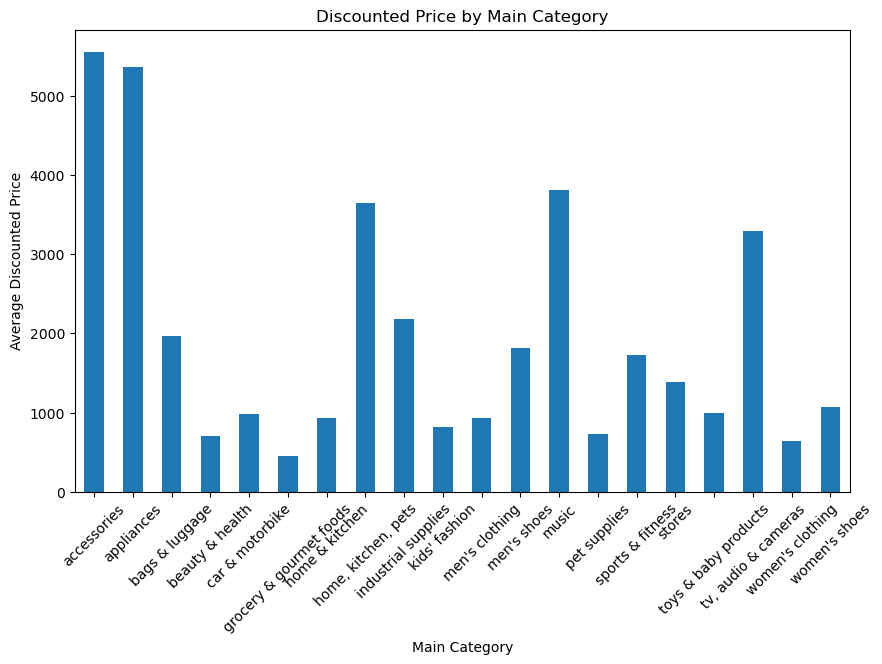

In [37]:
plt.figure(figsize=(10, 6))
azs.groupby('main_category')['discount_price'].mean().plot(kind='bar')
plt.title('Discounted Price by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Discounted Price')
plt.xticks(rotation=45)
plt.show()

33. Actual Price by Main Category (Logarithmic Scale)

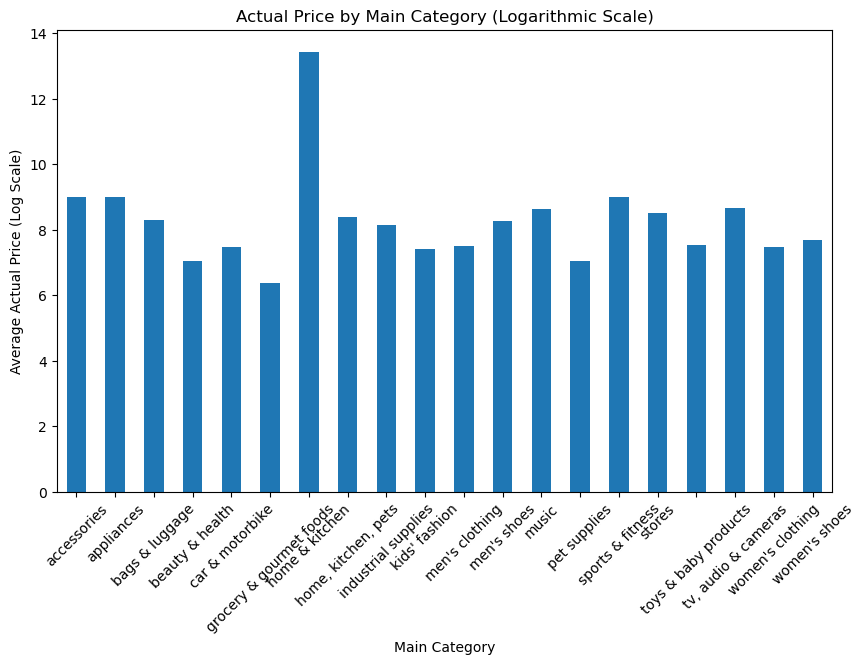

In [38]:
plt.figure(figsize=(10, 6))
azs.groupby('main_category')['actual_price'].mean().apply(np.log1p).plot(kind='bar')
plt.title('Actual Price by Main Category (Logarithmic Scale)')
plt.xlabel('Main Category')
plt.ylabel('Average Actual Price (Log Scale)')
plt.xticks(rotation=45)
plt.show()

34. Top 10 Sub-Categories by Avg. Discounted Price

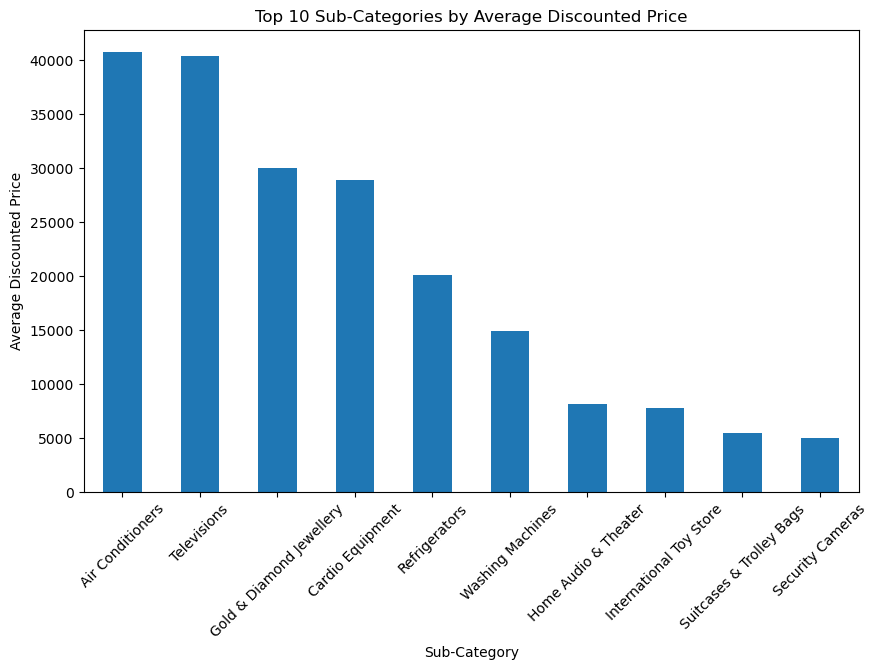

In [39]:
plt.figure(figsize=(10, 6))
azs.groupby('sub_category')['discount_price'].mean().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sub-Categories by Average Discounted Price')
plt.xlabel('Sub-Category')
plt.ylabel('Average Discounted Price')
plt.xticks(rotation=45)
plt.show()

35. Top 10 Sub-Categories by Avg. Actual Price (Logarithmic Scale)

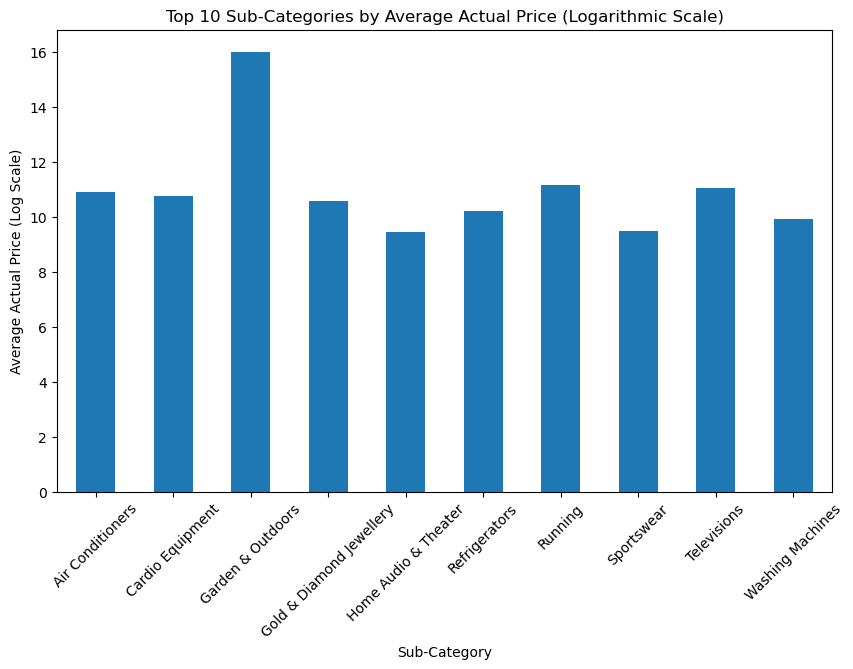

In [40]:
# Calculate the average actual price for each sub-category
sub_category_actual_price = azs.groupby('sub_category')['actual_price'].mean()

# Select the top 10 sub-categories by average actual price
top_sub_categories = sub_category_actual_price.nlargest(10).index

# Filter the DataFrame to include only the top 10 sub-categories
azs_top_sub_categories = azs[azs['sub_category'].isin(top_sub_categories)]

plt.figure(figsize=(10, 6))
azs_top_sub_categories.groupby('sub_category')['actual_price'].mean().apply(np.log1p).plot(kind='bar')
plt.title('Top 10 Sub-Categories by Average Actual Price (Logarithmic Scale)')
plt.xlabel('Sub-Category')
plt.ylabel('Average Actual Price (Log Scale)')
plt.xticks(rotation=45)
plt.show()

In [41]:
azs.columns

Index(['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings',
       'discount_price', 'actual_price'],
      dtype='object')